### Churn Dataset Project


In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error 

print("Setup Complete")

Setup Complete


In [57]:
# load data
df = pd.read_csv('customer_churn_dataset-training-master.csv')

df.head(7)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
5,8.0,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8.0,1.0
6,9.0,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24.0,1.0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [59]:
df = df.dropna()
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

Subscription Type
Standard    149128
Premium     148678
Basic       143026
Name: count, dtype: int64

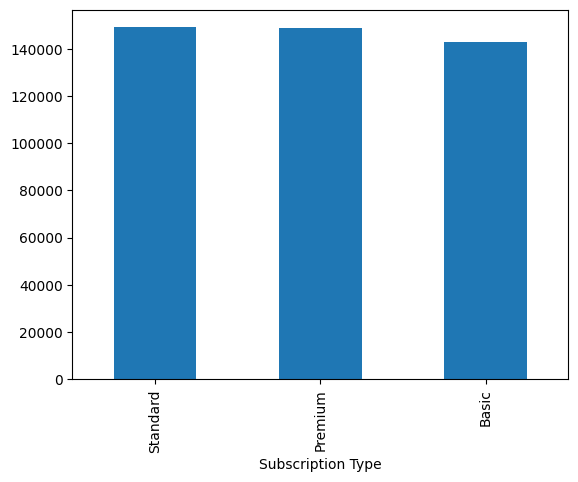

In [60]:
df['Subscription Type'].value_counts().plot.bar()
df['Subscription Type'].value_counts()

Gender
Male      250252
Female    190580
Name: count, dtype: int64

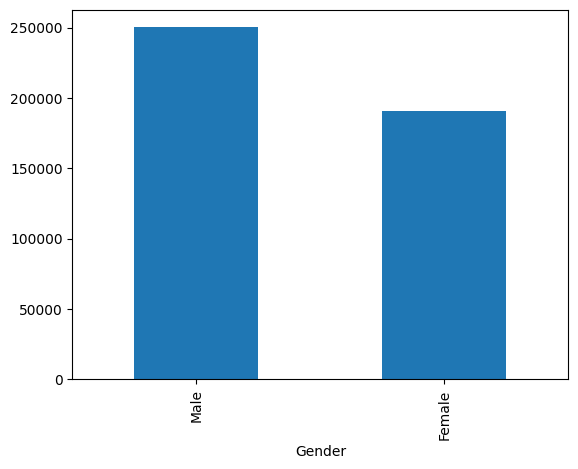

In [61]:
df.Gender.value_counts().plot.bar()
df['Gender'].value_counts()

In [62]:
df['Contract Length'].value_counts()

Contract Length
Annual       177198
Quarterly    176530
Monthly       87104
Name: count, dtype: int64

In [63]:
df.drop(columns='CustomerID',inplace=True)


Text(0.5, 1.0, 'The count plot of Subscription Type with respect to Churn')

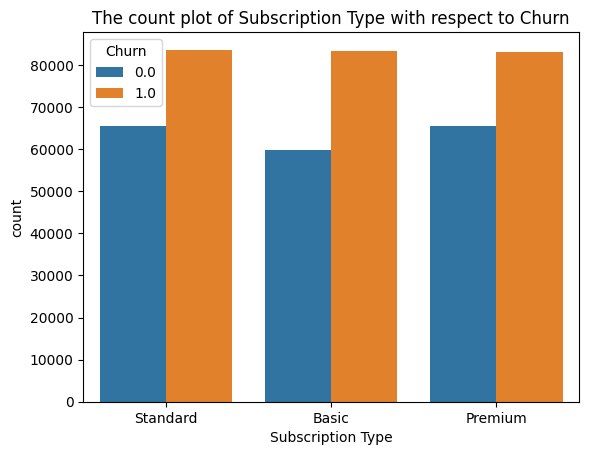

In [64]:
target_name = "Churn"
particular_column = "Subscription Type"

sns.countplot(data = df , x = particular_column , hue = target_name )
plt.title(f'The count plot of {particular_column} with respect to {target_name}')

Text(0.5, 1.0, 'The count plot of Contract Length with respect to Churn')

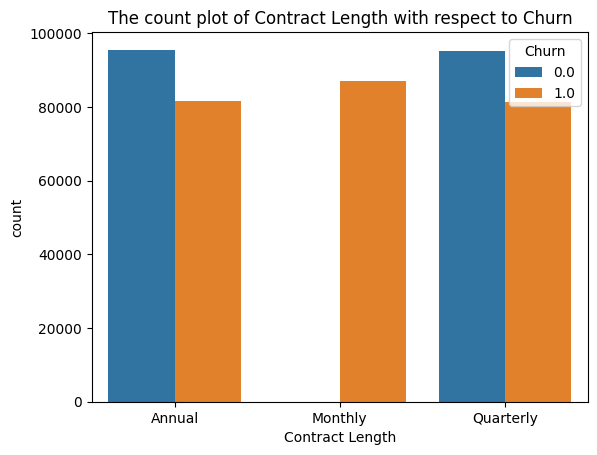

In [65]:
target_name = "Churn"
particular_column = "Contract Length"

sns.countplot(data = df , x = particular_column , hue = target_name )
plt.title(f'The count plot of {particular_column} with respect to {target_name}')

Text(0.5, 1.0, 'The count plot of Gender with respect to Churn')

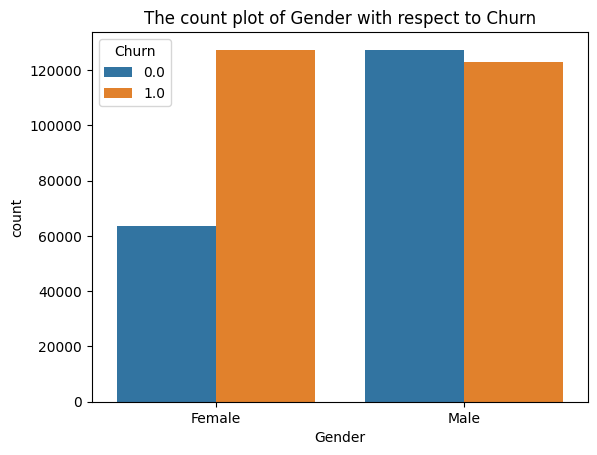

In [66]:
target_name = "Churn"
particular_column = "Gender"

sns.countplot(data = df , x = particular_column , hue = target_name )
plt.title(f'The count plot of {particular_column} with respect to {target_name}')

In [67]:
df['Gender'] = (df['Gender']=='Male').astype(int)
# male = 1 , female = 0
df.head(7)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,0,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,0,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,1,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,1,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
5,51.0,1,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8.0,1.0
6,58.0,0,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24.0,1.0


forming the relation


In [68]:
df1 = df[['Age', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Total Spend',
       'Last Interaction','Churn']]
df1.corr()


,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
Age,1.000000,-0.011630,-0.007190,0.158451,0.061738,-0.084684,0.028980,0.218394
Tenure,-0.011630,1.000000,-0.026800,-0.027640,-0.016588,0.019006,-0.006903,-0.051919
Usage Frequency,-0.007190,-0.026800,1.000000,-0.022013,-0.014470,0.018631,-0.004662,-0.046101
Support Calls,0.158451,-0.027640,-0.022013,1.000000,0.162889,-0.221594,0.077684,0.574267
Payment Delay,0.061738,-0.016588,-0.014470,0.162889,1.000000,-0.121044,0.042708,0.312129
Total Spend,-0.084684,0.019006,0.018631,-0.221594,-0.121044,1.000000,-0.056890,-0.429355
Last Interaction,0.028980,-0.006903,-0.004662,0.077684,0.042708,-0.056890,1.000000,0.149616
Churn,0.218394,-0.051919,-0.046101,0.574267,0.312129,-0.429355,0.149616,1.000000


<Axes: >

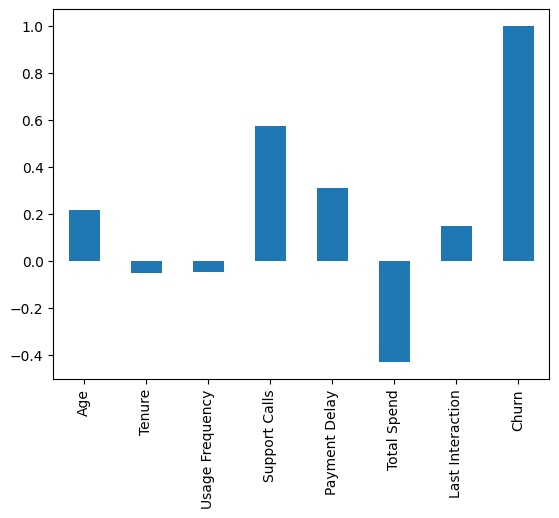

In [69]:
df1.corr()["Churn"].plot(kind='bar')

In [70]:
related = ['Age', 'Support Calls',
       'Payment Delay', 
       'Last Interaction']

## Train


In [71]:
df.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn'],
      dtype='object')

In [72]:
# choose the target y
y = df['Churn']

# chose the features X
features = ['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Total Spend',
       'Last Interaction']



X = df[related]

train_X,val_X,train_y,val_y=train_test_split(X,y,random_state=0)


### DesicionTreeRegression

In [73]:

# Define decisionTree model
df_model = DecisionTreeRegressor(random_state=0,max_leaf_nodes=500)

# Fit model
df_model.fit(train_X,train_y)

# Predict
df_predict = df_model.predict(val_X)

# Evealuate using find the MAE
df_MAE = mean_absolute_error(val_y , df_predict)

print(df_MAE)

0.1236007552769929


In [74]:
# using best leaf node = 500

df_model = DecisionTreeRegressor(random_state=0,max_leaf_nodes=500)
df_model.fit(X,y)
df_predict = df_model.predict(X)
df_MAE = mean_absolute_error(y,df_predict)
print(df_MAE)

0.12187290844185646


Test with test dataset and calculate the MAE

In [75]:
# Test dataset
test_df = pd.read_csv('customer_churn_dataset-testing-master.csv')

test_X = test_df[related]
test_y = test_df['Churn']

In [76]:

df_model = DecisionTreeRegressor(random_state=0,max_leaf_nodes=500)
df_model.fit(X,y)
df_predict = df_model.predict(test_X)
df_MAE = mean_absolute_error(test_y,df_predict)

print(f'The MAE of test dataset : {df_MAE}')


The MAE of test dataset : 0.43121625557936744


### Random Forest Regression

In [77]:
from sklearn.ensemble import RandomForestRegressor

print("setup complete")

setup complete


In [78]:
 

model = RandomForestRegressor(random_state=0)
model.fit(train_X,train_y)
pred = model.predict(val_X)
MAE = mean_absolute_error(val_y,pred)

print(f'The MAE is {MAE}')

The MAE is 0.12595788697801732


In [79]:
model = RandomForestRegressor(random_state=0) 
model.fit(X,y)
pred = model.predict(test_X)
MAE = mean_absolute_error(test_y,pred)

print(f'The MAE is {MAE}')

The MAE is 0.43199898219257876


but this looks like overfitting

### Final model

In [80]:
# This is the final model using desicion tree

model = DecisionTreeRegressor(max_leaf_nodes=500,random_state=0)
model.fit(X,y)
pred = model.predict(X)
MAE = mean_absolute_error(y,pred)

print(f'The MAE value is {MAE} ')

The MAE value is 0.12187290844185646 
